In [2]:
import numpy as np
from scipy.stats import norm

# -----------------------------
# 1. settings
# -----------------------------
S        = 1000         # number of importance samples
mu_q     = 0.0          # proposal mean
sigma_q  = 2.0          # proposal std-dev

# -----------------------------
# 2. draw from proposal q(w)
# -----------------------------
w_q = np.random.normal(mu_q, sigma_q, size=S)

# -----------------------------
# 3. importance weights p(w)/q(w)
# -----------------------------
log_p = norm.logpdf(w_q, loc=0.0,   scale=1.0)   # target prior  N(0,1)
log_q = norm.logpdf(w_q, loc=mu_q, scale=sigma_q)
weights = np.exp(log_p - log_q)                  # un-normalised weights

# -----------------------------
# 4. evaluate f(w) = exp(w)
# -----------------------------
f = np.exp(w_q)

# -----------------------------
# 5. self-normalised IS estimate of E[f(w)]
# -----------------------------
m_IS = np.sum(weights * f) / np.sum(weights)

print(f"Importance-sampling estimate of E[y] ≈ {m_IS:.4f}")

# step 4a: draw y | w  ~ N(exp(w), 1)
y = np.random.normal(f, 1.0)         # f already holds exp(w)

# step 5a: weighted mean of the y's instead of exp(w)
m_IS_y = np.sum(weights * y) / np.sum(weights)



Importance-sampling estimate of E[y] ≈ 1.6571


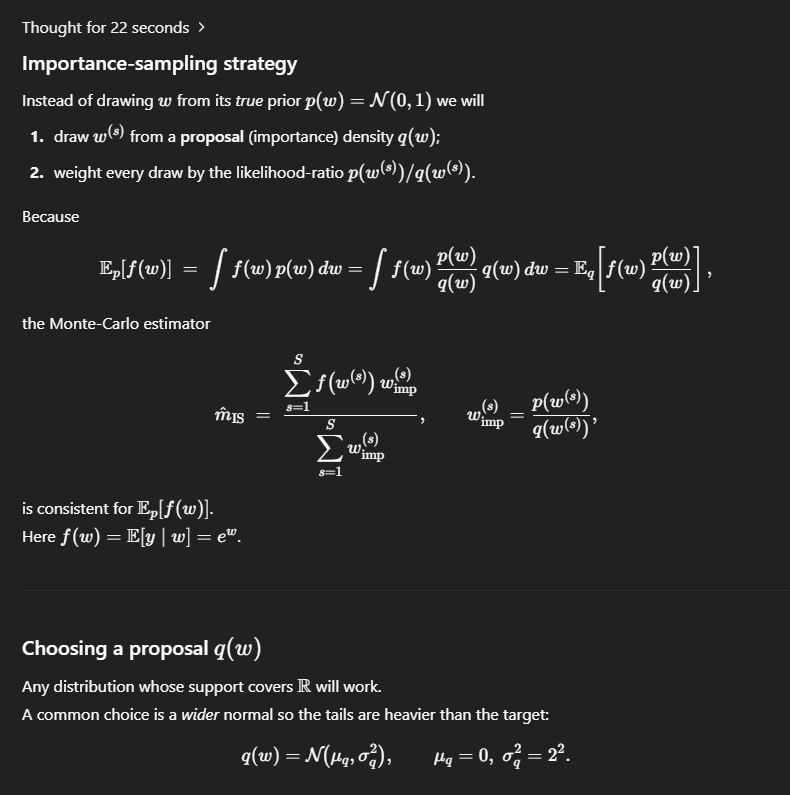

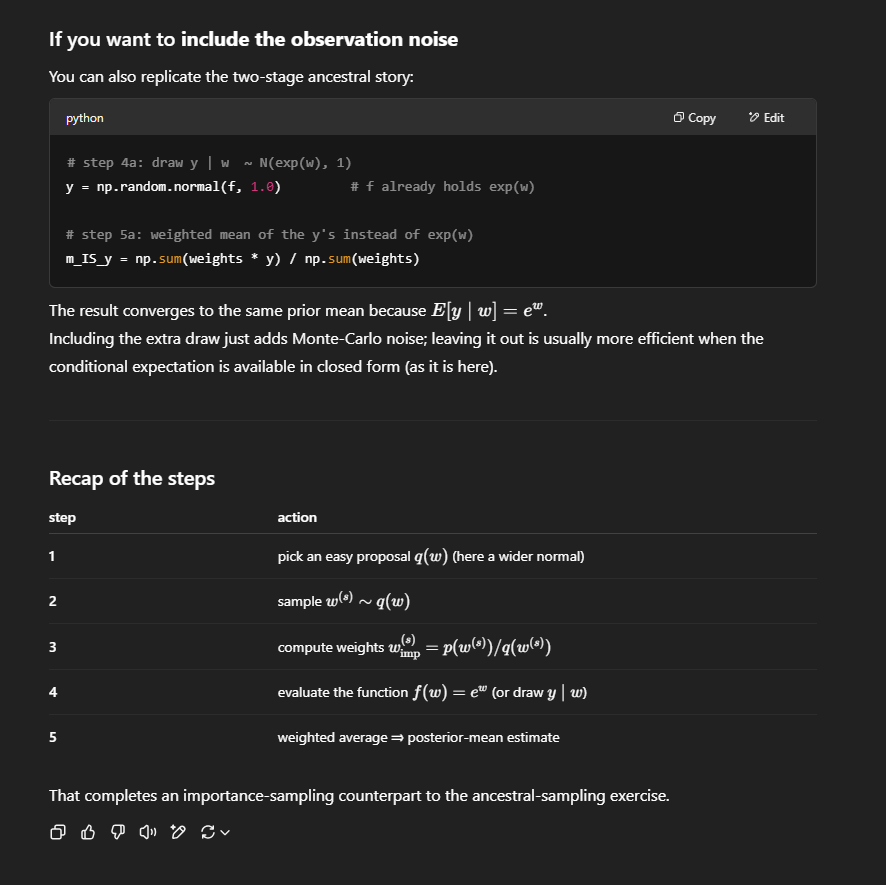